# 3.1 Pre-processing and Transformation

Python program to pre-process and transform the dataset into a format suitable for developing machine learning models. For feature selection, using the filter method.

## 1. Initializing datatypes of datasets
Here we define the data type for each column so we understand what kind of data we are working with and can use this to initialize our dataset correctly.

We can use `get_dtypes` to then generate a list of dtypes which can then be used in the structured array of the datasets that will be loaded.

## 2. Data Processing Pipeline
In this section we will look at the data processing steps we take for both Gwp and Star datasets.

#### Load data from csv files into structured arrays for both datasets

### Global processing methods
Here we define functions that can or will be used for either datasets that are loaded in.

#### Date conversion
This function is used to convert all dates from a string to a date object, since we have a date column in one of our datasets.

#### Date feature extraction
Here we will write a function that takes the date column and breaks it into multiple columns, extracting the following features from the date objects:
- Month
- Day of the month
- Year


#### Encoding categorical data
In this cell we define two functions which are used to convert categorical columns with non-real datatypes to float datatypes.

#### Filling missing numbers in dataset
This will fine any missing numbers in our dataset and fill them in, using most_frequent for integers, and mean for floats. 

### Gwp pipeline

#### Gwp Date and Day columns processing
In this function, we work to fill missing date and day values. To make sure we replace empty values with the correct information, we must look at both the day column and date column and compare the two with the previous column.



#### Gwp Quarter column processing
In the dataset, we know what quarter each row has to be by looking at the date:
- Day 1 - 7 = Quarter1
- Day 8 - 14 = Quarter2
- Day 15 - 21 = Quarter3
- Day 22 - 28 = Quarter4
- Day 29 - 31 = Quarter5

Therefore, we can fill empty values using this method (after we have finished processing the dates).

#### Gwp department column processing

#### Final Gwp Pipeline function
Here we define the function that runs through all the necessary processing steps for the gwp dataset using the functions we have specified above.

### Star Pipeline

## 3. Running our Pipeline

### Load Datasets
The gwp and star datasets are loaded from csv files. We will be loading the data into structured arrays, using the dtypes we have specified at the beginning.

### Process Datasets

## 5. Data splitting & Feature Selection

### Split Feature and and target sets

Here we define two functions that will help us split our structured array of the dataset into feature and target sets.

### Filter method for feature selection

We will evaluate the significance of each feature independently,using different methods to filter out insignificant features and help determine each feature's relative importance. 

#### 1. Removing Near-Constant Features
Near-constant features are those that have very low variance across all instances in the dataset. These features do not contribute much useful information to the model, as they barely help in discriminating between different instances. Therefore, it is beneficial to remove them from the dataset before training a machine learning model.

In this function, the near-constant features are identified and removed from the dataset by setting the threshold to 0.01

#### 2. Correlation Coefficients Between Input Features and the Target Variable

This code calculates the correlation coefficients between each input feature and the target variable using NumPy's corrcoef function. It then creates a dictionary called feature_correlations, which maps the feature names to their corresponding correlation coefficients. This dictionary allows for easy interpretation of the linear relationship between each feature and the target variable.

## GWP feature selection

In [95]:
SEED = 40

# Initialise list of features to drop
gwp_dropped_features = []

# Split feature and target sets
X, y = split_features_and_target(gwp_processed_data)
X_names, y_name = get_column_names(gwp_processed_data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Normalise the data 
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print(X_train_norm)

[[-1.          1.         -0.8        ... -1.         -1.
  -0.28735632]
 [-1.         -1.          1.         ... -1.         -1.
  -0.81609195]
 [-1.          0.          0.13333333 ... -1.         -1.
  -0.26436782]
 ...
 [-1.         -1.         -0.4        ... -1.         -1.
   0.17241379]
 [-1.         -1.         -1.         ... -1.         -1.
  -0.86206897]
 [-1.         -1.         -0.2        ... -1.         -1.
  -0.83908046]]


#### Near-constant features

In [96]:
constant_threshold = 0.01
selected_columns, constant_columns = get_const_features(X_train_norm, X_names, threshold=0.01)
gwp_dropped_features = list(set(gwp_dropped_features + constant_columns))

print('Selected columns:', selected_columns)
print('Constant columns:', constant_columns)

Selected columns: ['month', 'day_of_month', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
Constant columns: ['year', 'incentive', 'idle_time']


#### Feature correlation

If we take a closer look at the coefficients we can see that year, smv, and targeted_productivity are `NaN`, indicating that there is no correlation between these feature & target values.    

/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


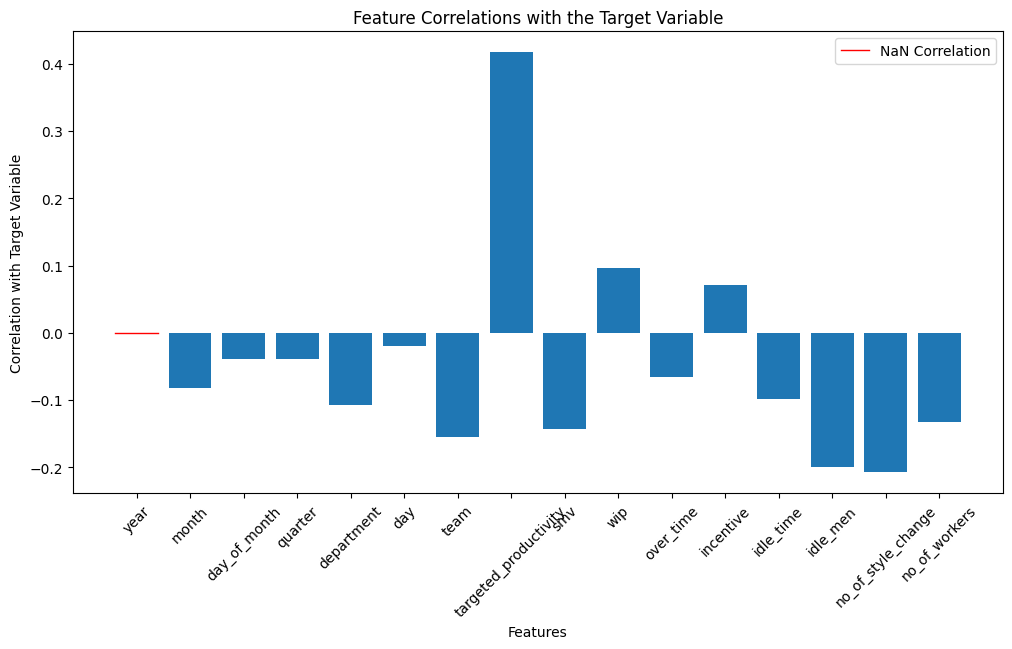

In [97]:
feature_correlations = get_feature_correlations(X_train_norm, y_train, X_names)
plot_feature_correlations(feature_correlations)

#### Feature correlation threshold

In [98]:
correlation_threshold = 0.05

low_correlation_features = get_low_correlation_features(feature_correlations, threshold=correlation_threshold)
gwp_dropped_features = list(set(gwp_dropped_features + low_correlation_features))

print ('Low correlation features:', low_correlation_features)

Low correlation features: ['year', 'day_of_month', 'quarter', 'day']


## Star feature selection

In [99]:
SEED = 40

# Initialise list of features to drop
star_dropped_features = []

# Split feature and target sets
X, y = split_features_and_target(star_processed_data)
X_names, y_name = get_column_names(star_processed_data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Normalise the data 
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print(X_train_norm)

[[ 0.15994324  0.03055724  0.99802372 ... -0.41454279  0.0010923
   0.57757758]
 [ 0.88624988 -0.54057606  0.99787177 ... -0.34451592  0.06963408
   0.76976977]
 [-0.12962948 -0.65898955  0.99806054 ... -0.41926553  0.00518842
  -0.35535536]
 ...
 [-0.76849414 -0.64493359  0.99794585 ...  0.48277828  0.76542873
  -0.56156156]
 [ 0.83728627 -0.58227673  0.99827061 ... -0.34044459  0.06417258
   0.21921922]
 [ 0.42895524  0.0882928   0.99805856 ... -0.23100725  0.15155653
   0.83583584]]


#### Near-constant features

In [100]:
constant_threshold = 0.01
selected_columns, constant_columns = get_const_features(X_train_norm, X_names, threshold=0.01)
star_dropped_features = list(set(star_dropped_features + constant_columns))

print('Selected columns:', selected_columns)
print('Constant columns:', constant_columns)

Selected columns: ['alpha', 'delta', 'r', 'i', 'run_ID', 'cam_col', 'field_ID', 'class', 'redshift', 'plate', 'MJD']
Constant columns: ['u', 'g', 'z', 'rerun_ID']


#### Feature correlation

/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


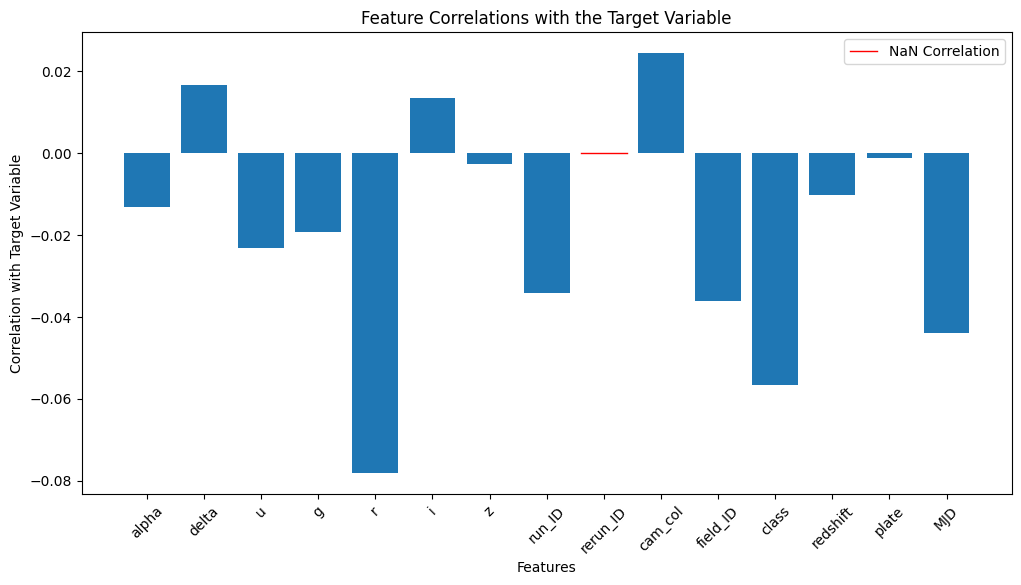

In [101]:
feature_correlations = get_feature_correlations(X_train_norm, y_train, X_names)
plot_feature_correlations(feature_correlations)

#### Feature correlation threshold

In [102]:
correlation_threshold = 0.005

low_correlation_features = get_low_correlation_features(feature_correlations, threshold=correlation_threshold)
star_dropped_features = list(set(star_dropped_features + low_correlation_features))

print ('Low correlation features:', low_correlation_features)

Low correlation features: ['z', 'rerun_ID', 'plate']


### Final Datasets
Prepare the final version of the dataset by removing the features we have decided to filter out using methods shown above.

In [103]:


print('GWP dropped features:', gwp_dropped_features)
print('Star dropped features:', star_dropped_features)
print('\n')

# Update datasets with dropped features
# gwp_dataset = remove_columns(gwp_processed_data, gwp_dropped_features)
# star_dataset = remove_columns(star_processed_data, star_dropped_features)

# Keep all features
gwp_dataset = gwp_processed_data
star_dataset = star_processed_data

print('GWP dataset:\n', gwp_dataset, gwp_dataset.dtype)
print('\n Star dataset:\n', star_dataset, star_dataset.dtype)

GWP dropped features: ['incentive', 'day', 'day_of_month', 'year', 'idle_time', 'quarter']
Star dropped features: ['rerun_ID', 'g', 'z', 'plate', 'u']


GWP dataset:
 [(2015, 1,  1, 0., 1., 3.,  8, 0.8 , 26.16, 1108, 7080, 98, 0, 0, 0, 59, 0.94072542)
 (2015, 1,  1, 0., 0., 3.,  1, 0.75,  3.94, 1039,  960,  0, 0, 0, 0,  8, 0.8865    )
 (2015, 1,  1, 0., 1., 3., 11, 0.8 , 11.41,  968, 3660, 50, 0, 0, 0,  8, 0.80057049)
 ...
 (2015, 3, 11, 1., 0., 5.,  7, 0.65,  3.9 , 1039,  960,  0, 0, 0, 0,  8, 0.625625  )
 (2015, 3, 11, 1., 0., 5.,  9, 0.75,  2.9 , 1039, 1800,  0, 0, 0, 0, 15, 0.50588889)
 (2015, 3, 11, 1., 0., 5.,  6, 0.7 ,  2.9 , 1039,  720,  0, 0, 0, 0,  6, 0.39472222)] [('year', '<i8'), ('month', '<i8'), ('day_of_month', '<i8'), ('quarter', '<f8'), ('department', '<f8'), ('day', '<f8'), ('team', '<i8'), ('targeted_productivity', '<f8'), ('smv', '<f8'), ('wip', '<i8'), ('over_time', '<i8'), ('incentive', '<i8'), ('idle_time', '<i8'), ('idle_men', '<i8'), ('no_of_style_change', '<i8

In [104]:
# Split feature and target sets
X_gwp, y_gwp = split_features_and_target(gwp_dataset)
X_gwp_names, y_gwp_name = get_column_names(gwp_dataset)

X_star, y_star = split_features_and_target(star_dataset)
X_star_names, y_star_name = get_column_names(star_dataset)


Stored 'gwp_set' (tuple)
Stored 'star_set' (tuple)


## Markdown Question: 
**Question**: Explain the logic behind usage of pearson correlation coefficient for feature selection.